#### Librerias 

In [107]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import SnowballStemmer
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import unicodedata
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [108]:
### Descargar stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Cargue datos

In [109]:
Df = pd.read_csv("C:/Users/USER/OneDrive - universidadean.edu.co/5. NLP/Repositorio NLP/Actividad 1/reviews_booking.csv")
Df

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25124\1533673389.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Df = pd.read_csv("C:/Users/USER/OneDrive - universidadean.edu.co/5. NLP/Repositorio NLP/Actividad 1/reviews_booking.csv")


,Unnamed: 0,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10,"Ubicación, comodidades y limpieza",NaN,Sí
2,2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...
438208,438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,"9,0",NaN,NaN,No
438209,438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10,NaN,NaN,No
438210,438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,"1,0",No me pareció nada,No obstante que dos días antes de mi llegada a...,Sí
438211,438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10,NaN,NaN,No


In [110]:
Df['Calificación'] = Df['Calificación'].astype(str).str.replace(',', '.').astype(float)
Df = Df.drop("Unnamed: 0", axis=1)
Df

,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10.0,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10.0,"Ubicación, comodidades y limpieza",NaN,Sí
2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10.0,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10.0,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10.0,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,9.0,NaN,NaN,No
438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10.0,NaN,NaN,No
438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,1.0,No me pareció nada,No obstante que dos días antes de mi llegada a...,Sí
438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10.0,NaN,NaN,No


In [111]:
Df.describe()

,Calificación
count,438213.000000
mean,8.401774
std,1.974704
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


### Preprocesamiento

#### 1. Normalización

- Minisculas
- Espacio despues de caracteres
- Eliminar caracteres
- Eliminar numeros
- Eliminar tildes

In [112]:
Df_preprocesado = Df.copy()

# Convertir a minúsculas las columnas específicas
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].str.lower()
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].str.lower()

# Añadir espacio después de ciertos caracteres
caracteres = r'[.,;]'
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].str.replace(caracteres, lambda m: m.group(0) + ' ', regex=True)
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].str.replace(caracteres, lambda m: m.group(0) + ' ', regex=True)

# Eliminar caracteres especiales
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].str.replace(r"[\W_]+", " ", regex=True)
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].str.replace(r"[\W_]+", " ", regex=True)

# Eliminar números
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].str.replace(r"\d+", "", regex=True)
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].str.replace(r"\d+", "", regex=True)

# Función para eliminar tildes
def eliminar_tildes(texto):
    if isinstance(texto, str):  # Verifica que sea texto
        return ''.join(
            char for char in unicodedata.normalize('NFD', texto)
            if unicodedata.category(char) != 'Mn'
        )
    return texto

# Aplicar la función a las columnas
Df_preprocesado["Cosas Positivas"] = Df_preprocesado["Cosas Positivas"].apply(eliminar_tildes)
Df_preprocesado["Cosas Negativas"] = Df_preprocesado["Cosas Negativas"].apply(eliminar_tildes)

Df_preprocesado

,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10.0,fue la mejor opcion que pudimos haber tomado e...,NaN,Sí
1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10.0,ubicacion comodidades y limpieza,NaN,Sí
2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10.0,el lugar esta muy bien ubicado el apartamento ...,NaN,Sí
3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10.0,todo estuvo perfecto la ubicacion y la relacio...,NaN,Sí
4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10.0,es muy comodo y acogedor la atencion es excele...,NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,9.0,NaN,NaN,No
438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10.0,NaN,NaN,No
438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,1.0,no me parecio nada,no obstante que dos dias antes de mi llegada a...,Sí
438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10.0,NaN,NaN,No


##### Filtrar base positivos

- Se filtran las comentarios con al menos 7 stopwords para garantizar que sean del idioma español
- Se filtran los comentarios con una califcación mayor a 9
- Se filtran comentarios con una logintud minimo da ## para poder obtener mayor informacion util

In [113]:
# Crear una lista de stopwords
stop_words = set(stopwords.words('spanish'))

#Función para contar stopwords en un texto
def count_stopwords(text):
    if not isinstance(text, str):
        return 0
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

# Contar stopwords en la columna 'Cosas Positivas'
stopword_counts = Df_preprocesado['Cosas Positivas'].apply(count_stopwords)

# Filtrar filas con menos de 5 stopwords
Df_filtrado_positivo = Df_preprocesado[stopword_counts >= 15]

# Filtrar filas donde 'Cosas Positivas' tenga más de #### palabra
Df_filtrado_positivo = Df_filtrado_positivo[Df_filtrado_positivo['Cosas Positivas'].str.split().str.len() > 30]

# Filtrar filas donde 'Calificación' sea mayor a 9
Df_filtrado_positivo = Df_filtrado_positivo[Df_filtrado_positivo['Calificación'] > 9]

Df_filtrado_positivo


,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10.0,fue la mejor opcion que pudimos haber tomado e...,NaN,Sí
7,Colombia,NaN,11 noches,julio de 2023,Persona que viaja sola,21 de julio de 2023,Excelente lugar!,10.0,la limpieza todo tal cual la foto pero lo mejo...,todo estuvo muy bien recomendado al,Sí
17,Ecuador,NaN,5 noches,octubre de 2024,Persona que viaja sola,29 de octubre de 2024,Excepcional,10.0,me gusto poder comprar los alimentos a mi gust...,NaN,Sí
70,Colombia,NaN,1 noche,agosto de 2022,En familia,9 de agosto de 2022,"Maravilloso alojamiento, recomendado!",10.0,la calidad de personas es maravilloso desde qu...,NaN,Sí
476,Ecuador,NaN,1 noche,agosto de 2024,Persona que viaja sola,26 de agosto de 2024,Excepcional,10.0,la atencion como me recibieron es muy buena po...,NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438075,Colombia,Apartamento de 1 dormitorio,5 noches,noviembre de 2024,Persona que viaja sola,10 de noviembre de 2024,Súper,10.0,el apartamento tiene vista muy bonita puedes s...,NaN,Sí
438081,Colombia,Habitación Individual,1 noche,junio de 2024,Persona que viaja sola,2 de junio de 2024,Excelente y buen precio,10.0,el mejor hotel boutique en el que me he quedad...,todo estuvo muy bien,Sí
438083,Colombia,Habitación Individual,1 noche,junio de 2024,Persona que viaja sola,2 de junio de 2024,Confortable y Conveniente,10.0,el personal fue amable y atento la habitacion ...,NaN,Sí
438170,Colombia,Apartamento de 1 dormitorio,11 noches,julio de 2024,En familia,5 de agosto de 2024,Excelente,10.0,excelente ubicacion con muchos museos y zonas ...,NaN,Sí


##### Filtrar base negativos

- Se filtran las comentarios con al menos 7 stopwords para garantizar que sean del idioma español
- Se filtran los comentarios con una califcación menor a 7
- Se filtran comentarios con una logintud minimo de 40 para poder obtener mayor informacion util

In [114]:
# Crear una lista de stopwords
stop_words = set(stopwords.words('spanish'))

#Función para contar stopwords en un texto
def count_stopwords(text):
    if not isinstance(text, str):
        return 0
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

# Contar stopwords en la columna 'Cosas Positivas'
stopword_counts = Df_preprocesado['Cosas Negativas'].apply(count_stopwords)

# Filtrar filas con menos de 5 stopwords
Df_filtrado_negativo = Df_preprocesado[stopword_counts >= 20]

# Filtrar filas donde 'Cosas Positivas' tenga más de #### palabra
Df_filtrado_negativo = Df_filtrado_negativo[Df_filtrado_negativo['Cosas Negativas'].str.split().str.len() > 50]

# Filtrar filas donde 'Calificación' sea menor
Df_filtrado_negativo = Df_filtrado_negativo[Df_filtrado_negativo['Calificación'] < 7]

Df_filtrado_negativo


,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
53,Colombia,NaN,6 noches,enero de 2024,Persona que viaja sola,20 de enero de 2024,Mal,3.0,la compresion y solucion con el problema de la...,realmente las instalaciones estan en mal estad...,Sí
61,Puerto Rico,NaN,2 noches,marzo de 2023,Persona que viaja sola,2 de abril de 2023,Aceptable,5.0,la ubicacion los espacios fuera de la habitaci...,la habitacion las sabanas en la cama estaban s...,Sí
83,Colombia,NaN,3 noches,octubre de 2022,En grupo,17 de octubre de 2022,Publicidad engañosa en cuanto al precio.,1.0,esta ubicado en una zona segura,doy una calificacion baja ya que al realizar l...,Sí
88,Colombia,NaN,1 noche,julio de 2022,Persona que viaja sola,30 de julio de 2022,"Esperaba una habitacion mejor, con un aire lim...",5.0,el desayuno me parecio excelente la senora que...,llegue a las de la tarde me dieron una habit...,Sí
90,Colombia,NaN,3 noches,febrero de 2022,Persona que viaja sola,10 de marzo de 2022,Sin agua caliente,3.0,servicio b b normal ubicacion estrategica,el servicio prestado no fue para nada satisfac...,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438073,Italia,Estudio Familiar,3 noches,julio de 2024,En pareja,1 de agosto de 2024,Mal,3.0,lo unico bueno fue la posicion lastima el serv...,la habitacion se veia bastante sucia y la cama...,Sí
438113,Colombia,Habitación Doble,1 noche,mayo de 2024,Persona que viaja sola,20 de mayo de 2024,No volveré ni lo recomendaré a mis amigos o fa...,2.0,que esta experiencia me enseno que no debo cam...,publicidad enganosa ofrecen servicios que no t...,Sí
438157,Chile,Habitación Doble,1 noche,abril de 2024,Persona que viaja sola,25 de abril de 2024,Malo el alojamiento,3.0,NaN,tv sin control remoto banos con pisos muy peli...,Sí
438199,Colombia,Apartamento de 1 dormitorio,8 noches,diciembre de 2023,Persona que viaja sola,26 de diciembre de 2023,Agradable,6.0,creo que el ambiente es bastante agradable aun...,el problema que tuve con un duvet blanco que s...,Sí


#### 2. Tokenizacion


##### Comentarios positivos

In [115]:
# Crear el tokenizador con expresión regular para palabras
tokenizer = RegexpTokenizer(r'\w+')

# Aplicar el tokenizador a cada fila de la columna "Cosas Negativas"
Df_filtrado_positivo["Cosas Positivas Tokenizadas"] = Df_filtrado_positivo["Cosas Positivas"].apply(lambda x: tokenizer.tokenize(x))

# Mostrar el DataFrame con la nueva columna tokenizada
Df_filtrado_positivo["Cosas Positivas Tokenizadas"]

0         [fue, la, mejor, opcion, que, pudimos, haber, ...
7         [la, limpieza, todo, tal, cual, la, foto, pero...
17        [me, gusto, poder, comprar, los, alimentos, a,...
70        [la, calidad, de, personas, es, maravilloso, d...
476       [la, atencion, como, me, recibieron, es, muy, ...
                                ...                        
438075    [el, apartamento, tiene, vista, muy, bonita, p...
438081    [el, mejor, hotel, boutique, en, el, que, me, ...
438083    [el, personal, fue, amable, y, atento, la, hab...
438170    [excelente, ubicacion, con, muchos, museos, y,...
438178    [ubicacion, genial, la, zona, muy, segura, dic...
Name: Cosas Positivas Tokenizadas, Length: 5819, dtype: object

##### Comentarios negativos

In [116]:
# Asegurarse de que los datos de texto estén en formato de string antes de tokenizar
#Df_filtrado_negativo["Cosas Negativas"] = Df_filtrado_negativo["Cosas Negativas"].astype(str)

# Aplicar el tokenizador de palabras a cada fila de la columna "Cosas Negativas"
#Df_filtrado_negativo["Cosas Negativas Tokenizadas"] = Df_filtrado_negativo["Cosas Negativas"].apply(lambda x: word_tokenize(x))

# Mostrar el DataFrame con la nueva columna tokenizada
#Df_filtrado_negativo["Cosas Negativas Tokenizadas"]

In [117]:
# Crear el tokenizador con expresión regular para palabras
tokenizer = RegexpTokenizer(r'\w+')

# Aplicar el tokenizador a cada fila de la columna "Cosas Negativas"
Df_filtrado_negativo["Cosas Negativas Tokenizadas"] = Df_filtrado_negativo["Cosas Negativas"].apply(lambda x: tokenizer.tokenize(x))

# Mostrar el DataFrame con la nueva columna tokenizada
Df_filtrado_negativo["Cosas Negativas Tokenizadas"]

53        [realmente, las, instalaciones, estan, en, mal...
61        [la, habitacion, las, sabanas, en, la, cama, e...
83        [doy, una, calificacion, baja, ya, que, al, re...
88        [llegue, a, las, de, la, tarde, me, dieron, un...
90        [el, servicio, prestado, no, fue, para, nada, ...
                                ...                        
438073    [la, habitacion, se, veia, bastante, sucia, y,...
438113    [publicidad, enganosa, ofrecen, servicios, que...
438157    [tv, sin, control, remoto, banos, con, pisos, ...
438199    [el, problema, que, tuve, con, un, duvet, blan...
438210    [no, obstante, que, dos, dias, antes, de, mi, ...
Name: Cosas Negativas Tokenizadas, Length: 5885, dtype: object

#### 3. Eliminar stopwords

##### Comentarios positivos

In [118]:
# Carga las stopwords en español
stop_words = set(stopwords.words('spanish'))
print(f"Stopwords en español: {stop_words}")

def eliminar_stopwords(lista_palabras):
    if isinstance(lista_palabras, list):  # Verifica si es una lista
        procesadas = [palabra.lower() for palabra in lista_palabras if palabra.lower() not in stop_words]
        return procesadas
    else:
        print(f"No es una lista: {lista_palabras}")  # Debug
        return lista_palabras  # Si no es una lista, devuelve sin cambios

Df_filtrado_positivo["Cosas Positivas Sin Stopwords"] = Df_filtrado_positivo["Cosas Positivas Tokenizadas"].apply(eliminar_stopwords)
Df_filtrado_positivo["Cosas Positivas Sin Stopwords"]

Stopwords en español: {'he', 'tuvo', 'hubieran', 'hasta', 'estás', 'habrás', 'estuviéramos', 'sois', 'sentido', 'las', 'fueron', 'tenías', 'ha', 'estuvieseis', 'habíamos', 'yo', 'tuvierais', 'éramos', 'tienes', 'tendrá', 'sentid', 'suya', 'vosotros', 'será', 'nuestros', 'hubieras', 'sobre', 'qué', 'seré', 'eso', 'unos', 'te', 'estabais', 'todo', 'estará', 'habida', 'teníamos', 'a', 'estabas', 'sean', 'son', 'nosotras', 'haya', 'estar', 'que', 'estuve', 'esa', 'contra', 'estaríais', 'hubiese', 'seréis', 'tenidos', 'mucho', 'estad', 'fuéramos', 'o', 'estados', 'para', 'hubierais', 'quienes', 'tuviesen', 'quien', 'nuestras', 'tuya', 'tengan', 'tendrás', 'teníais', 'algunas', 'hubiste', 'estuviste', 'más', 'tuvisteis', 'esos', 'también', 'estoy', 'mías', 'suyas', 'tenéis', 'habidos', 'tuviste', 'ellos', 'desde', 'había', 'tuvieras', 'tendrán', 'habrán', 'sentidas', 'habría', 'tú', 'mío', 'tenían', 'sentidos', 'hubisteis', 'se', 'seremos', 'me', 'estén', 'tengo', 'habido', 'y', 'del', 'habr

0         [mejor, opcion, pudimos, haber, tomado, bogota...
7         [limpieza, tal, foto, mejor, anfitrion, super,...
17        [gusto, poder, comprar, alimentos, gusto, cuen...
70        [calidad, personas, maravilloso, reciben, dan,...
476       [atencion, recibieron, buena, parte, senor, ra...
                                ...                        
438075    [apartamento, vista, bonita, puedes, sentarte,...
438081    [mejor, hotel, boutique, quedado, bogota, aten...
438083    [personal, amable, atento, habitacion, impecab...
438170    [excelente, ubicacion, museos, zonas, turistic...
438178    [ubicacion, genial, zona, segura, dicha, agua,...
Name: Cosas Positivas Sin Stopwords, Length: 5819, dtype: object

##### Comentarios negativos

In [119]:
# Carga las stopwords en español
stop_words = set(stopwords.words('spanish'))
print(f"Stopwords en español: {stop_words}")

def eliminar_stopwords(lista_palabras):
    if isinstance(lista_palabras, list):  # Verifica si es una lista
        procesadas = [palabra.lower() for palabra in lista_palabras if palabra.lower() not in stop_words]
        return procesadas
    else:
        print(f"No es una lista: {lista_palabras}")  # Debug
        return lista_palabras  # Si no es una lista, devuelve sin cambios

Df_filtrado_negativo["Cosas Negativas Sin Stopwords"] = Df_filtrado_negativo["Cosas Negativas Tokenizadas"].apply(eliminar_stopwords)
Df_filtrado_negativo["Cosas Negativas Sin Stopwords"]


Stopwords en español: {'he', 'tuvo', 'hubieran', 'hasta', 'estás', 'habrás', 'estuviéramos', 'sois', 'sentido', 'las', 'fueron', 'tenías', 'ha', 'estuvieseis', 'habíamos', 'yo', 'tuvierais', 'éramos', 'tienes', 'tendrá', 'sentid', 'suya', 'vosotros', 'será', 'nuestros', 'hubieras', 'sobre', 'qué', 'seré', 'eso', 'unos', 'te', 'estabais', 'todo', 'estará', 'habida', 'teníamos', 'a', 'estabas', 'sean', 'son', 'nosotras', 'haya', 'estar', 'que', 'estuve', 'esa', 'contra', 'estaríais', 'hubiese', 'seréis', 'tenidos', 'mucho', 'estad', 'fuéramos', 'o', 'estados', 'para', 'hubierais', 'quienes', 'tuviesen', 'quien', 'nuestras', 'tuya', 'tengan', 'tendrás', 'teníais', 'algunas', 'hubiste', 'estuviste', 'más', 'tuvisteis', 'esos', 'también', 'estoy', 'mías', 'suyas', 'tenéis', 'habidos', 'tuviste', 'ellos', 'desde', 'había', 'tuvieras', 'tendrán', 'habrán', 'sentidas', 'habría', 'tú', 'mío', 'tenían', 'sentidos', 'hubisteis', 'se', 'seremos', 'me', 'estén', 'tengo', 'habido', 'y', 'del', 'habr

53        [realmente, instalaciones, estan, mal, dias, c...
61        [habitacion, sabanas, cama, sucias, boronas, c...
83        [doy, calificacion, baja, realizar, reserva, a...
88        [llegue, tarde, dieron, habitacion, ubicada, p...
90        [servicio, prestado, satisfactorio, trabajo, d...
                                ...                        
438073    [habitacion, veia, bastante, sucia, cama, pequ...
438113    [publicidad, enganosa, ofrecen, servicios, cap...
438157    [tv, control, remoto, banos, pisos, peligrosos...
438199    [problema, duvet, blanco, mancho, bocado, choc...
438210    [obstante, dos, dias, llegada, avise, llegaria...
Name: Cosas Negativas Sin Stopwords, Length: 5885, dtype: object

#### 4. Lematización

##### Comentarios positivos

In [120]:
nlp = spacy.load("es_core_news_sm")

# Función para lematizar (sin eliminar stopwords)
def solo_lematizar(lista_palabras):
    if isinstance(lista_palabras, list):  # Asegúrate de que sea una lista
        texto = " ".join(lista_palabras)  # Convierte la lista a un texto
        doc = nlp(texto)  # Procesa el texto con spaCy
        # Lematiza y devuelve todas las palabras (incluyendo stopwords y puntuación si están presentes)
        return [token.lemma_ for token in doc]
    else:
        return lista_palabras  # Devuelve sin cambios si no es una lista

# Aplica la función a la columna
Df_filtrado_positivo["Cosas Positivas Lematizadas"] = Df_filtrado_positivo["Cosas Positivas Sin Stopwords"].apply(solo_lematizar)

# Verifica los resultados
Df_filtrado_positivo["Cosas Positivas Lematizadas"].info()
Df_filtrado_positivo["Cosas Positivas Lematizadas"]


<class 'pandas.core.series.Series'>
Index: 5819 entries, 0 to 438178
Series name: Cosas Positivas Lematizadas
Non-Null Count  Dtype 
--------------  ----- 
5819 non-null   object
dtypes: object(1)
memory usage: 90.9+ KB


0         [mejor, opcion, pudimos, haber, tomar, bogota,...
7         [limpiezar, tal, foto, mejor, anfitrion, super...
17        [gusto, poder, comprar, alimento, gusto, conta...
70        [calidad, persona, maravilloso, recibir, dar, ...
476       [atencion, recibir, buen, parte, senor, raul, ...
                                ...                        
438075    [apartamento, visto, bonito, poder, sentar tú,...
438081    [mejor, hotel, boutique, quedado, bogota, aten...
438083    [personal, amable, atento, habitacion, impecab...
438170    [excelente, ubicacion, museo, zona, turistica,...
438178    [ubicacion, genial, zona, seguro, dicho, agua,...
Name: Cosas Positivas Lematizadas, Length: 5819, dtype: object

##### Comentarios negativos

In [121]:

nlp = spacy.load("es_core_news_sm")

# Función para lematizar (sin eliminar stopwords)
def solo_lematizar(lista_palabras):
    if isinstance(lista_palabras, list):  # Asegúrate de que sea una lista
        texto = " ".join(lista_palabras)  # Convierte la lista a un texto
        doc = nlp(texto)  # Procesa el texto con spaCy
        # Lematiza y devuelve todas las palabras (incluyendo stopwords y puntuación si están presentes)
        return [token.lemma_ for token in doc]
    else:
        return lista_palabras  # Devuelve sin cambios si no es una lista

# Aplica la función a la columna
Df_filtrado_negativo["Cosas Negativas Lematizadas"] = Df_filtrado_negativo["Cosas Negativas Sin Stopwords"].apply(solo_lematizar)

# Verifica los resultados
Df_filtrado_negativo["Cosas Negativas Lematizadas"]



53        [realmente, instalación, estar, mal, dia, comp...
61        [habitacion, sabana, cama, sucio, borona, cabe...
83        [dar, calificacion, bajar, realizar, reserva, ...
88        [llegar, tarde, dar, habitacion, ubicada, pati...
90        [servicio, prestado, satisfactorio, trabajo, d...
                                ...                        
438073    [habitacion, veiar, bastante, sucio, cama, peq...
438113    [publicidad, enganós, ofrecer, servicio, capac...
438157    [tv, control, remoto, bano, piso, peligroso, a...
438199    [problema, duvet, blanco, mancho, bocado, choc...
438210    [obstante, dos, dia, llegado, avise, llegario,...
Name: Cosas Negativas Lematizadas, Length: 5885, dtype: object

#### 5. Representación numerica

##### Comentarios positivos

##### TF-IDF

In [122]:
Df_filtrado_positivo["Cosas Positivas Sin Stopwords"] = Df_filtrado_positivo["Cosas Positivas Sin Stopwords"].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else x
)

tfidf_vectorizer_positivos= TfidfVectorizer(ngram_range=(2, 2))

# Ajusta y transforma los datos
tfidf_matrix_positivos = tfidf_vectorizer_positivos.fit_transform(Df_filtrado_positivo["Cosas Positivas Sin Stopwords"])

# Obtén las características (palabras únicas o bigramas)
tfidf_features_positivos = tfidf_vectorizer_positivos.get_feature_names_out()

# Convierte la matriz dispersa a un DataFrame
df_tfidf_positivos = pd.DataFrame(tfidf_matrix_positivos.toarray(), columns=tfidf_features_positivos)

df_tfidf_positivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Columns: 86695 entries, aaa mil to 良いホテルてした excelente
dtypes: float64(86695)
memory usage: 3.8 GB


In [123]:
# Calcula la importancia promedio de cada término
word_importance = df_tfidf_positivos.mean().sort_values(ascending=False)

# Muestra las 40 palabras/bigramas más importantes
top_words_positivas = word_importance
top_words_positivas

personal amable         0.008277
atencion personal       0.006902
bien ubicado            0.004734
ubicacion excelente     0.004635
excelente ubicacion     0.004284
                          ...   
confortables cuisine    0.000010
proximite confort       0.000010
juste pourboire         0.000010
moins vie               0.000010
rrien des               0.000010
Length: 86695, dtype: float64

##### Count_vectorizer

In [124]:
# Inicializa el CountVectorizer
count_vectorizer_positivos = CountVectorizer(ngram_range=(2, 2))

# Aplica la transformación sobre la columna "Cosas Positivas Sin Stopwords"
count_matrix_positivos = count_vectorizer_positivos.fit_transform(Df_filtrado_positivo["Cosas Positivas Sin Stopwords"])

# Obtén las características (palabras únicas o bigramas)
count_features_positivos = count_vectorizer_positivos.get_feature_names_out()

# Convierte la matriz dispersa a un DataFrame
df_count_positivos = pd.DataFrame(count_matrix_positivos.toarray(), columns=count_features_positivos)

df_count_positivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Columns: 86695 entries, aaa mil to 良いホテルてした excelente
dtypes: int64(86695)
memory usage: 3.8 GB


In [125]:
# Calcula la frecuencia promedio de cada término
word_frequency = df_count_positivos.sum(axis=0).sort_values(ascending=False)

word_frequency.head(40)

personal amable         503
atencion personal       413
bien ubicado            244
ubicacion excelente     235
excelente ubicacion     220
cerca aeropuerto        201
personal atento         197
habitacion comoda       194
desayuno rico           192
cama comoda             178
desayuno delicioso      169
check in                168
ubicacion buena         167
ubicacion perfecta      166
calidad precio          165
excelente atencion      163
buena ubicacion         154
camas comodas           149
habitaciones comodas    147
personal hotel          147
super amable            146
agua caliente           144
excelente servicio      139
muchas gracias          138
desayuno bueno          137
ubicacion hotel         136
personal excelente      136
sentir casa             129
desayuno variado        127
personal super          126
centros comerciales     122
relacion calidad        116
zona tranquila          114
amabilidad personal     104
super bien              104
hotel excelente     

##### Comentarios negativos

##### TF-IDF

In [126]:
Df_filtrado_negativo["Cosas Negativas Sin Stopwords"] = Df_filtrado_negativo["Cosas Negativas Sin Stopwords"].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else x
)

# Inicializa el vectorizador TF-IDF
tfidf_vectorizer_negativos= TfidfVectorizer(ngram_range=(2, 2))  # Incluye unigramas y bigramas)

# Ajusta y transforma los datos
tfidf_matrix = tfidf_vectorizer_negativos.fit_transform(Df_filtrado_negativo["Cosas Negativas Sin Stopwords"])

# Obtén las características (palabras únicas o bigramas)
tfidf_features = tfidf_vectorizer_negativos.get_feature_names_out()

# Convierte la matriz dispersa a un DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

# Calcula la importancia promedio de cada término
word_importance = df_tfidf.mean().sort_values(ascending=False)

# Muestra las 20 palabras/bigramas más importantes
top_words_negativas = word_importance.head(40)
print(top_words_negativas)



check in                0.004810
agua caliente           0.004458
habitacion tenia        0.003111
aire acondicionado      0.002919
check out               0.002824
dieron habitacion       0.002485
toda noche              0.002474
dia siguiente           0.002401
papel higienico         0.002276
personal recepcion      0.002164
habia agua              0.002131
hacer check             0.001811
primer dia              0.001672
dos personas            0.001662
servicio cliente        0.001617
cambio habitacion       0.001616
atencion personal       0.001602
dos dias                0.001582
desayuno incluido       0.001563
cada vez                0.001560
mala experiencia        0.001546
llegar hotel            0.001537
mal servicio            0.001519
escucha ruido           0.001517
bano tenia              0.001505
pesimo servicio         0.001502
habitacion habia        0.001465
dos veces               0.001450
cama doble              0.001403
primer piso             0.001395
personal h

In [127]:
# Inicializa el CountVectorizer
count_vectorizer_negativos = CountVectorizer(ngram_range=(2, 2))

# Aplica la transformación sobre la columna "Cosas Positivas Sin Stopwords"
count_matrix_negativos = count_vectorizer_negativos.fit_transform(Df_filtrado_negativo["Cosas Negativas Sin Stopwords"])

# Obtén las características (palabras únicas o bigramas)
count_features_negativos = count_vectorizer_negativos.get_feature_names_out()

# Convierte la matriz dispersa a un DataFrame
df_count_negativos = pd.DataFrame(count_matrix_negativos.toarray(), columns=count_features_negativos)

df_count_negativos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5885 entries, 0 to 5884
Columns: 181174 entries, aa bogota to תור לספה
dtypes: int64(181174)
memory usage: 7.9 GB


In [128]:
# Calcula la frecuencia promedio de cada término
word_frequency = df_count_negativos.sum(axis=0).sort_values(ascending=False)

word_frequency.head(40)

check in                473
agua caliente           364
check out               242
habitacion tenia        220
aire acondicionado      208
dia siguiente           198
papel higienico         169
toda noche              167
dieron habitacion       164
personal recepcion      150
habia agua              139
hacer check             132
cambio habitacion       110
primer dia              109
dos personas            106
servicio cliente        106
mala experiencia        102
dos dias                102
cada vez                100
llegar hotel             99
pesimo servicio          96
desayuno incluido        96
atencion personal        95
mil pesos                93
dos noches               92
dos veces                91
mal servicio             89
bano tenia               89
escucha ruido            88
cama doble               87
personal hotel           86
varias veces             86
primer piso              86
habitacion habia         85
persona recepcion        82
hotel estrellas     

#### 6. Kmeans

##### Comentarios positivos

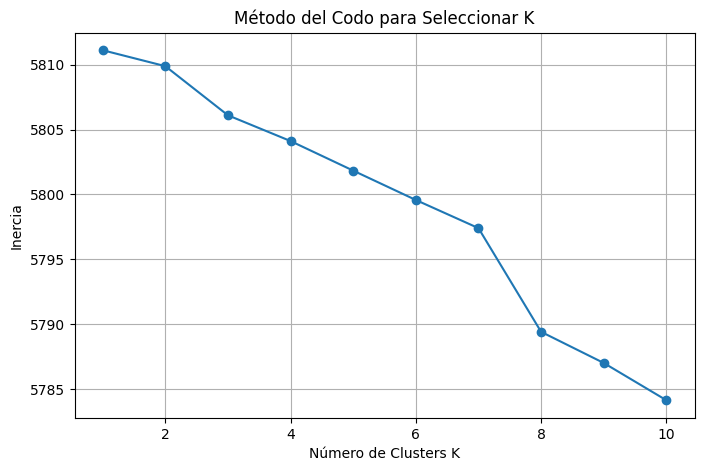

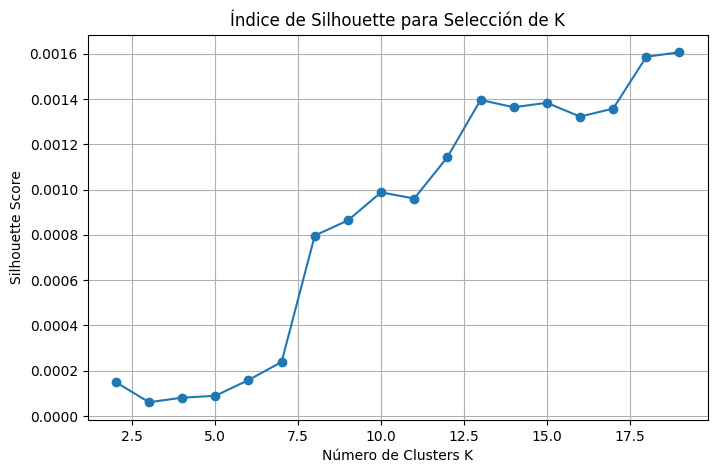

In [129]:
inertias = [] # sumar las funciones de costo para cada K
K_range = range(1, 11)

# Usa directamente tu matriz TF-IDF de positivos
X = tfidf_matrix_positivos  # tfidf_matrix_positivos es la matriz dispersa TF-IDF

# Calcular inercia para diferentes valores de K
for k in K_range: # para cada valor haga un Kmeans , hasta 11 , entrenando 11 modelos
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Método del Codo para Seleccionar K")
plt.xlabel("Número de Clusters K")
plt.ylabel("Inercia") # grafico como se comporta la inercia para cada cluster
plt.grid(True)
plt.show()

silhouette_scores = []
for k in range(2, 20):  # El índice de Silhouette no se define para K=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title("Índice de Silhouette para Selección de K")
plt.xlabel("Número de Clusters K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


##### Interpretación del índice de Silhouette:
Silhouette bajo (< 0.2):

Indica que los puntos están mal agrupados o los clusters no están claramente definidos.
En tu caso, los valores son extremadamente bajos (en el rango de 0.0001 a 0.0016), lo que confirma una pobre separación entre clusters.

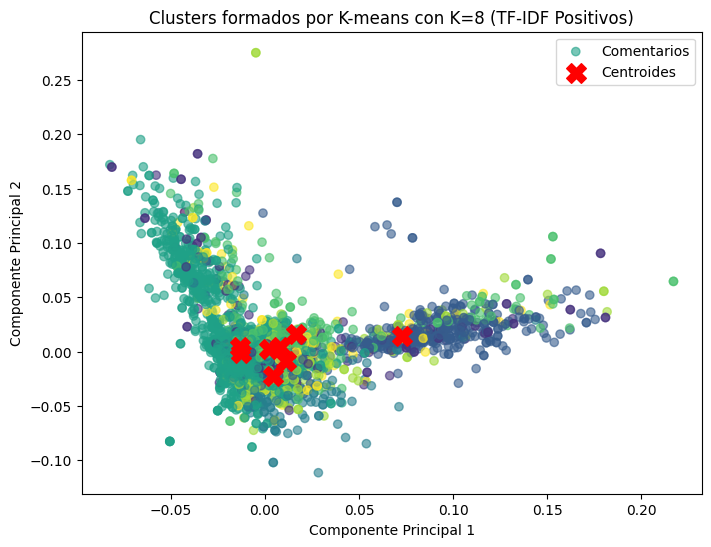

In [130]:
# Aplicar k-means con K=5 (puedes ajustar el número de clusters según sea necesario)
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)  # Entrena el modelo con la matriz TF-IDF

# Predecir los clusters
y_kmeans = kmeans.predict(X)  # Obtiene las asignaciones de cluster para cada comentario

# Reducir la dimensionalidad con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # Convierte la matriz dispersa a densa para PCA

# Proyectar los centroides al espacio reducido
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Graficar los clusters formados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6, label="Comentarios")  # Visualiza los clusters en 2D
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.title("Clusters formados por K-means con K=8 (TF-IDF Positivos)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()



In [131]:
# Obtén los centroides
centroids = kmeans.cluster_centers_

# Obtén los 10 términos más importantes por cluster
top_terms = centroids.argsort()[:, -10:]  # Índices de los 10 términos más importantes

# Mapear los índices a los términos originales del vocabulario usando el vectorizador
top_terms_words = []
for cluster in top_terms:
    words = [tfidf_vectorizer_positivos.get_feature_names_out()[index] for index in cluster]
    top_terms_words.append(words)

# Mostrar los términos más importantes por cluster
for i, terms in enumerate(top_terms_words):
    print(f"Cluster {i + 1}:")
    print(", ".join(terms))
    print()


Cluster 1:
recibi esperaba, asi recomiendo, hace meses, decir esperaba, mejor recibi, ahora puedo, esperaba perfecto, decir mejor, perfecto asi, puedo decir

Cluster 2:
excelente servicio, ubicacion cerca, agua caliente, hotel excelente, atencion personal, delicioso variado, personal amable, camas comodas, desayuno delicioso, excelente ubicacion

Cluster 3:
hotel bien, amable desayuno, cama comoda, ubicacion perfecta, bien ubicado, ubicacion buena, amable siempre, amable atento, cerca aeropuerto, personal amable

Cluster 4:
amable atento, amable desayuno, in check, hora check, staff super, hacer check, check out, personal super, check in, super amable

Cluster 5:
personal excelente, ubicacion hotel, cama comoda, personal hotel, habitacion comoda, ubicacion perfecta, buena ubicacion, excelente atencion, bien ubicado, atencion personal

Cluster 6:
cerca zona, rico variado, excelente desayuno, habitacion comoda, atencion personal, rico personal, personal amable, excelente cerca, desayuno 

##### Analisis K-Means

No se realiza para los negativos ya que no es un metodo adecuado y su clusterización no es efectiva

#### Preguntas

1. No funciona wordtokenize
2. Se eliminan las tildes?


#### Pendientes

Crear cluster de kmens palabras mas importantes
Toca hacer count vectorizer obligatoriamente
